# Email Spam Detection

## Understanding The Problem

#### We've all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.


#### In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let's get started!

## Data Extraction

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
spam_dataset = pd.read_csv("spam.csv",encoding='latin1')
spam_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [3]:
spam_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
spam_dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
spam_dataset = spam_dataset.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
spam_dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam_dataset.duplicated().sum()

403

In [7]:
spam_dataset = spam_dataset.drop_duplicates(keep = 'first')
spam_dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam_dataset.duplicated().sum()

0

In [9]:
print("No. of Row is : ", spam_dataset.shape[0])
print("No. of Column is : ", spam_dataset.shape[1])

No. of Row is :  5169
No. of Column is :  2


In [10]:
spam_dataset.rename(columns = {'v1' : 'Category', 'v2' : 'Message'}, inplace = True)
spam_dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()
spam_dataset["Category"] = encoder.fit_transform(spam_dataset["Category"])

## Exploratory Data Analysis

In [13]:
import nltk
from nltk import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mrityunjay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
spam_dataset["Category"].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

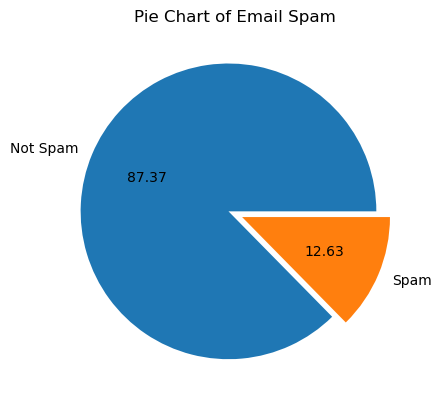

In [16]:
plt.title("Pie Chart of Email Spam")
plt.pie(spam_dataset["Category"].value_counts(),
        labels = ["Not Spam", "Spam"],
        autopct = "%0.2f",
        explode = [0.05, 0.05])
plt.show()

In [17]:
spam_dataset["Num_of_char"] = spam_dataset["Message"].apply(len)

In [18]:
spam_dataset.head()

,Category,Message,Num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
spam_dataset["Num_of_words"] = spam_dataset["Message"].apply(lambda x : len(nltk.word_tokenize(x)))
spam_dataset.head()

,Category,Message,Num_of_char,Num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
spam_dataset["Num_of_sentences"] = spam_dataset["Message"].apply(lambda x : len(nltk.sent_tokenize(x)))
spam_dataset.head()

,Category,Message,Num_of_char,Num_of_words,Num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
spam_dataset[["Num_of_char", "Num_of_words", "Num_of_sentences"]].describe()

,Num_of_char,Num_of_words,Num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# Describing Not Spam
spam_dataset[spam_dataset['Category'] == 0][["Num_of_char", "Num_of_words", "Num_of_sentences"]].describe()

,Num_of_char,Num_of_words,Num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# Describing Spam
spam_dataset[spam_dataset['Category'] == 1][["Num_of_char", "Num_of_words", "Num_of_sentences"]].describe()

,Num_of_char,Num_of_words,Num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='Num_of_char', ylabel='Count'>

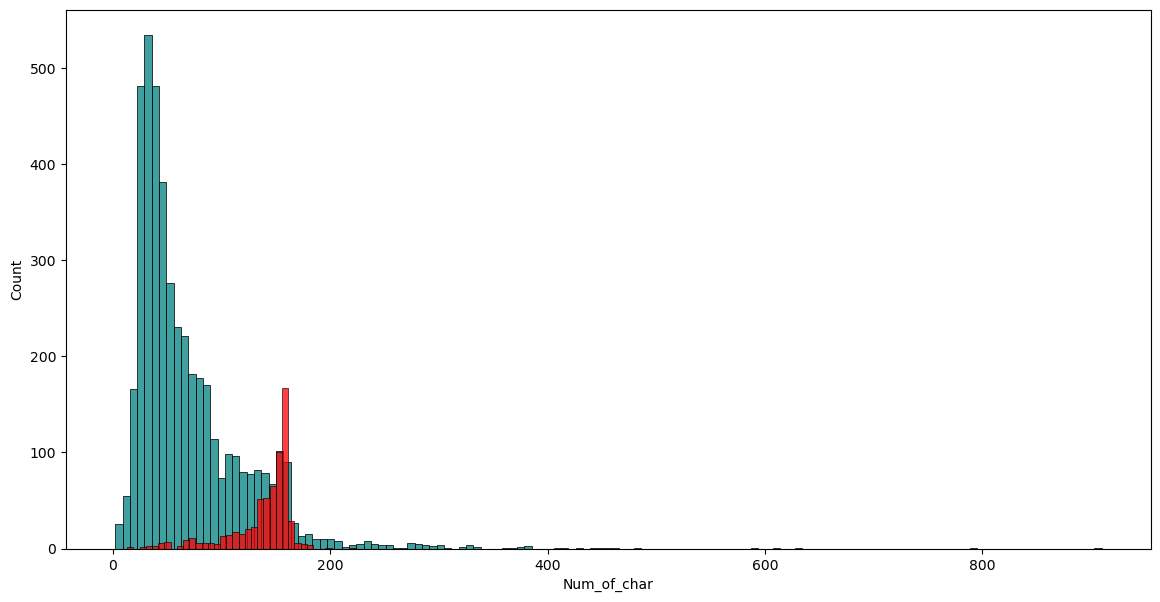

In [24]:
plt.figure(figsize = (14, 7))
sns.histplot(spam_dataset[spam_dataset['Category'] == 0]["Num_of_char"], color = 'teal')
sns.histplot(spam_dataset[spam_dataset['Category'] == 1]["Num_of_char"], color = 'red')

<Axes: xlabel='Num_of_words', ylabel='Count'>

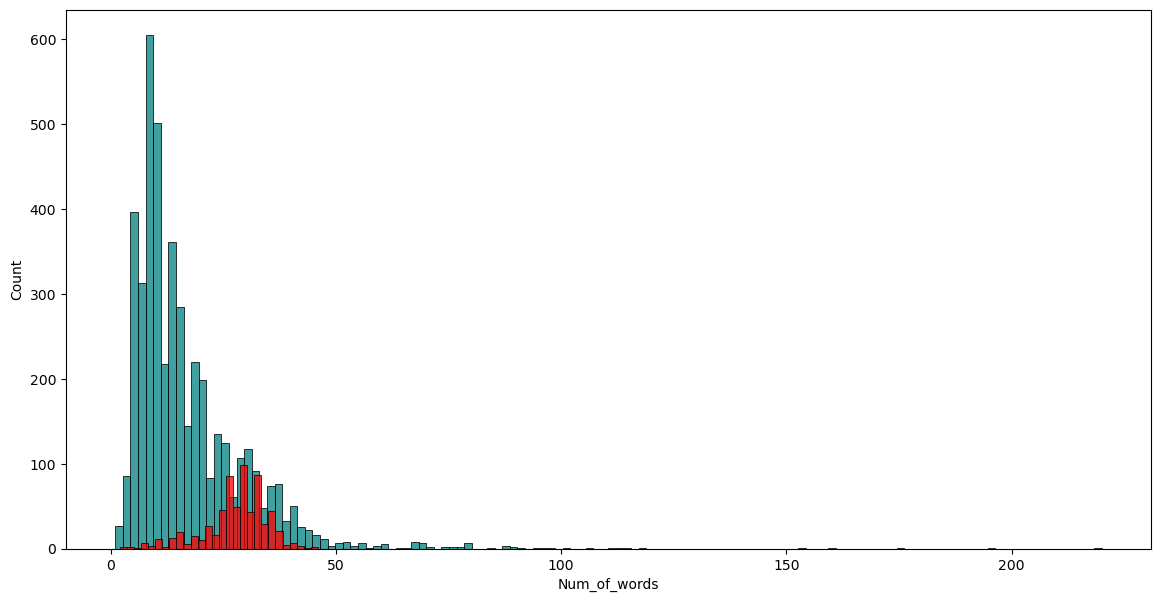

In [25]:
plt.figure(figsize = (14, 7))
sns.histplot(spam_dataset[spam_dataset['Category'] == 0]["Num_of_words"], color = 'teal')
sns.histplot(spam_dataset[spam_dataset['Category'] == 1]["Num_of_words"], color = 'red')

<Axes: xlabel='Num_of_sentences', ylabel='Count'>

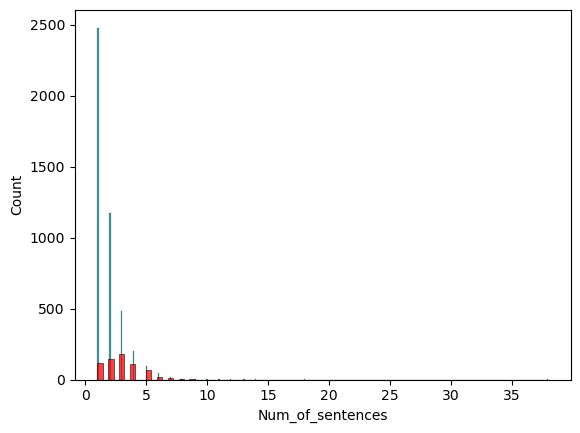

In [26]:
sns.histplot(spam_dataset[spam_dataset['Category'] == 0]["Num_of_sentences"], color = 'teal')
sns.histplot(spam_dataset[spam_dataset['Category'] == 1]["Num_of_sentences"], color = 'red')

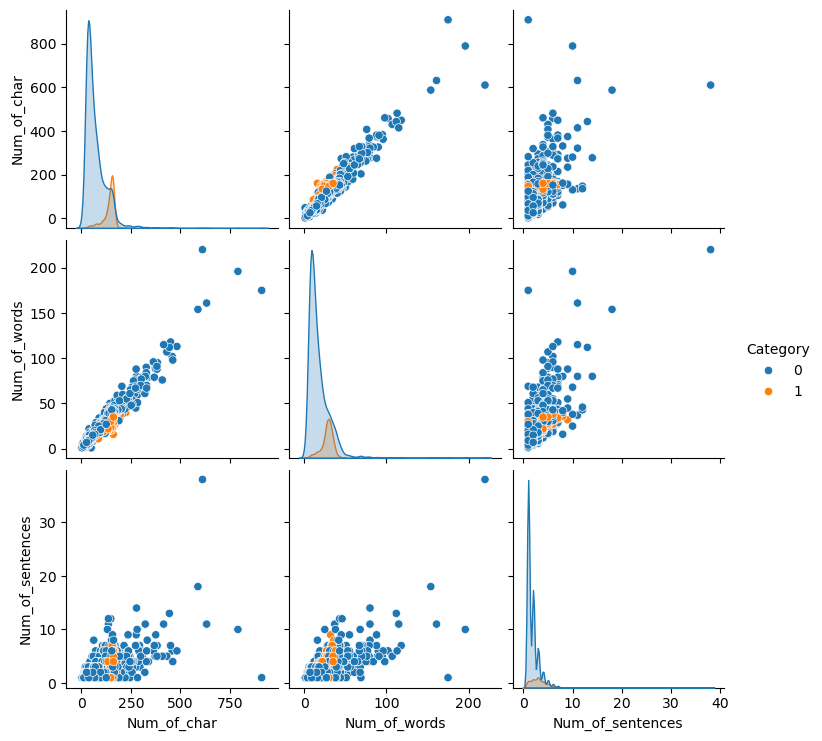

In [27]:
sns.pairplot(spam_dataset, hue = "Category")

<Axes: >

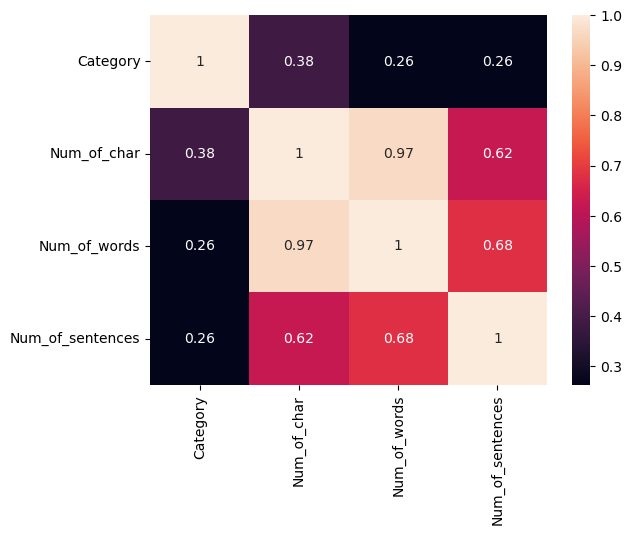

In [28]:
df = spam_dataset.drop(columns = "Message", axis = 1)
sns.heatmap(df.corr(), annot = True)

In [29]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [30]:
ps = PorterStemmer()

In [31]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    x = []
    for i in text:
        if i.isalnum():
            x.append(i)

    text = x[:]
    x.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation :
            x.append(i)

    text = x[:]
    x.clear()

    for i in text:
        x.append(ps.stem(i))

    return " ".join(x)      

In [32]:
transformed_text = text_transform("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


In [33]:
spam_dataset['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [34]:
ps.stem('Talking')

'talk'

In [35]:
spam_dataset["Transformed_msg"] = spam_dataset["Message"].apply(text_transform)
spam_dataset.head()

,Category,Message,Num_of_char,Num_of_words,Num_of_sentences,Transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
wc = WordCloud(width = 500,
               height = 500,
               min_font_size = 10,
               background_color = "white")

In [37]:
wc_spam = wc.generate(spam_dataset[spam_dataset['Category'] == 1]['Transformed_msg'].str.cat(sep = " "))

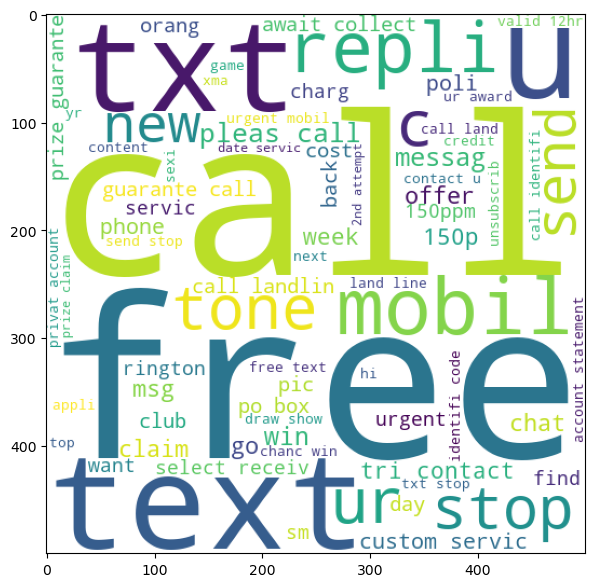

In [38]:
plt.figure(figsize = (14, 7))
plt.imshow(wc_spam)

In [39]:
wc_notspam = wc.generate(spam_dataset[spam_dataset['Category'] == 0]['Transformed_msg'].str.cat(sep = " "))

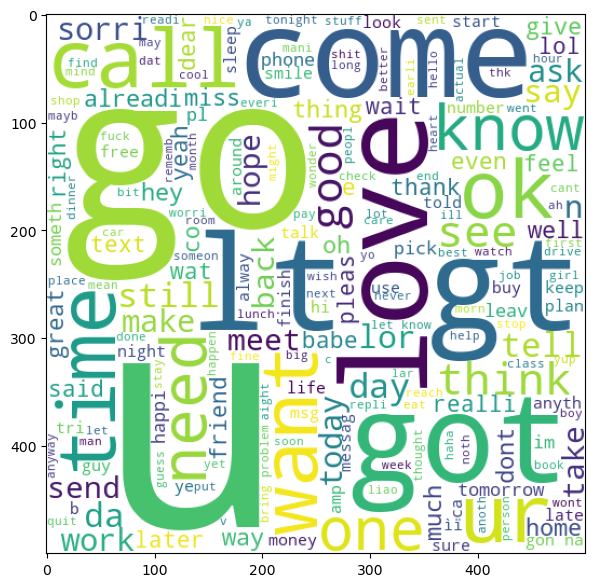

In [40]:
plt.figure(figsize = (14, 7))
plt.imshow(wc_notspam)

In [41]:
spam_corpus =[]

In [42]:
for msg in spam_dataset[spam_dataset['Category'] == 1]['Transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

In [44]:
from collections import Counter

In [45]:
a = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
b = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

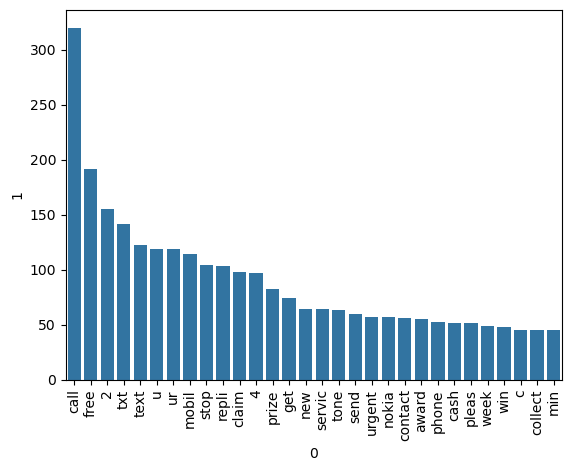

In [46]:
sns.barplot(x = a, y = b)
plt.xticks(rotation = 'vertical')
plt.show()

In [47]:
not_spam_corpus = []

In [48]:
for msg in spam_dataset[spam_dataset['Category'] == 0]['Transformed_msg'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [49]:
len(not_spam_corpus)

35404

In [50]:
a = pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0]
b = pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1]

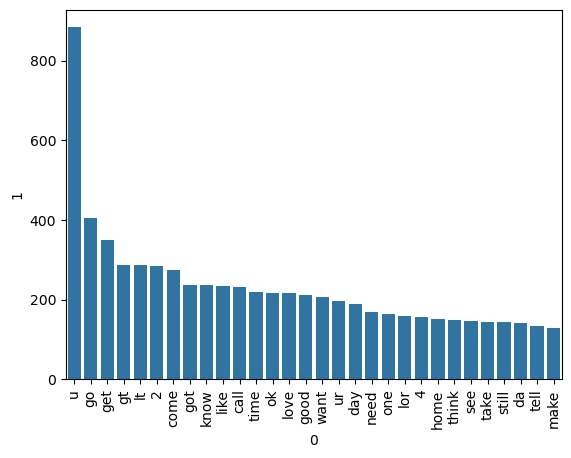

In [51]:
sns.barplot(x = a, y = b)
plt.xticks(rotation = 'vertical')
plt.show()

## Feature Selection

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [53]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 1000)

In [54]:
X = tfidf.fit_transform(spam_dataset["Transformed_msg"]).toarray()

In [55]:
X.shape

(5169, 1000)

In [56]:
Y = spam_dataset['Category'].values

In [57]:
Y.shape

(5169,)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 2)

## Incorporating Machine Learning Algorithms

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [60]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
xgb = XGBClassifier(n_estimators =50, random_state = 2)
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2)

In [63]:
classifiers = {
    'GNB' : gnb,
    'MNB' : mnb,
    'BNB' : bnb,
    'XGB' : xgb,
    'LR' : lr,
    'SVC' : svc,
    'DTC' : dtc,
    'KNC' : knc,
    'RFC' : rfc,
    'ABC' : abc,
    'BC' : bc,
    'ETC' : etc,
    'GBC' : gbc
}

In [64]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, prediction)
    precision = precision_score(Y_test, prediction)

    return accuracy, precision

In [65]:
accuracy_scores = []
precision_scores = []

## Testing the Models

In [66]:
for name, clf in classifiers.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    print("For ",name)
    print(f"Accuracy Score is :  {current_accuracy * 100}%")
    print(f"Precision Score is : {current_precision * 100}%\n")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GNB
Accuracy Score is :  82.0889748549323%
Precision Score is : 38.95522388059702%

For  MNB
Accuracy Score is :  97.33075435203095%
Precision Score is : 98.80952380952381%

For  BNB
Accuracy Score is :  97.94970986460349%
Precision Score is : 97.12230215827337%

For  XGB
Accuracy Score is :  96.67311411992263%
Precision Score is : 93.86973180076629%

For  LR
Accuracy Score is :  95.31914893617022%
Precision Score is : 93.30357142857143%

For  SVC
Accuracy Score is :  97.05996131528046%
Precision Score is : 95.43726235741445%

For  DTC
Accuracy Score is :  94.11992263056092%
Precision Score is : 83.26530612244898%

For  KNC
Accuracy Score is :  90.98646034816248%
Precision Score is : 98.80952380952381%

For  RFC
Accuracy Score is :  97.36943907156673%
Precision Score is : 96.95817490494296%

For  ABC
Accuracy Score is :  95.86073500967119%
Precision Score is : 90.31007751937985%

For  BC
Accuracy Score is :  95.62862669245648%
Precision Score is : 82.16560509554141%

For  ETC
Accu

In [67]:
performance = pd.DataFrame({'Classifier' : classifiers.keys(),
                           'Accuracy' : accuracy_scores,
                           'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [68]:
performance

,Classifier,Accuracy,Precision
1,MNB,0.973308,0.988095
7,KNC,0.909865,0.988095
2,BNB,0.979497,0.971223
8,RFC,0.973694,0.969582
5,SVC,0.970600,0.954373
11,ETC,0.974468,0.952727
3,XGB,0.966731,0.938697
4,LR,0.953191,0.933036
12,GBC,0.950870,0.923423
9,ABC,0.958607,0.903101


In [69]:
performance_x = pd.melt(performance, id_vars = "Classifier")
performance_x

,Classifier,variable,value
0,MNB,Accuracy,0.973308
1,KNC,Accuracy,0.909865
2,BNB,Accuracy,0.979497
3,RFC,Accuracy,0.973694
4,SVC,Accuracy,0.970600
5,ETC,Accuracy,0.974468
6,XGB,Accuracy,0.966731
7,LR,Accuracy,0.953191
8,GBC,Accuracy,0.950870
9,ABC,Accuracy,0.958607


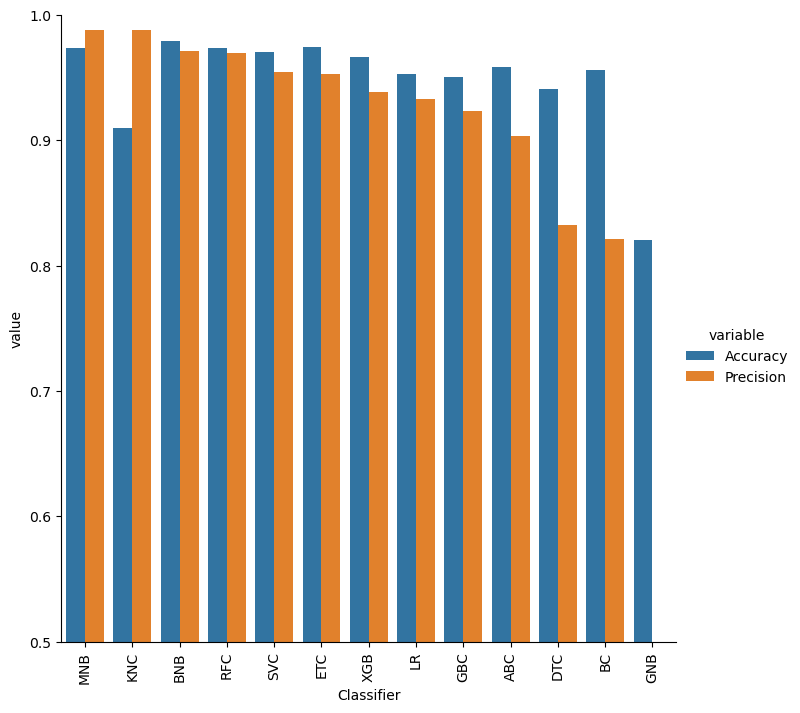

In [70]:
sns.catplot(x = "Classifier", y = "value",
           hue = "variable",
           data = performance_x,
           kind = "bar",
           height = 7)

plt.ylim(0.5, 1.0)
plt.xticks(rotation = "vertical")
plt.show()

In [71]:
df = pd.DataFrame({"Classifier" : classifiers.keys(),
                  "Accuracy_max_ft_3000" : accuracy_scores,
                  "Precision_max_ft_3000" : precision_scores,}).sort_values('Precision_max_ft_3000', ascending = False)

In [72]:
new_df = performance.merge(df, on = "Classifier")

In [73]:
new_df_scaled = new_df.merge(df, on = "Classifier")

In [74]:
df = pd.DataFrame({"Classifier" : classifiers.keys(),
                  "Accuracy_num" : accuracy_scores,
                  "Precision_num" : precision_scores,}).sort_values('Precision_num', ascending = False)

In [75]:
new_df_scaled.merge(df, on = "Classifier")

,Classifier,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num,Precision_num
0,MNB,0.973308,0.988095,0.973308,0.988095,0.973308,0.988095,0.973308,0.988095
1,KNC,0.909865,0.988095,0.909865,0.988095,0.909865,0.988095,0.909865,0.988095
2,BNB,0.979497,0.971223,0.979497,0.971223,0.979497,0.971223,0.979497,0.971223
3,RFC,0.973694,0.969582,0.973694,0.969582,0.973694,0.969582,0.973694,0.969582
4,SVC,0.970600,0.954373,0.970600,0.954373,0.970600,0.954373,0.970600,0.954373
5,ETC,0.974468,0.952727,0.974468,0.952727,0.974468,0.952727,0.974468,0.952727
6,XGB,0.966731,0.938697,0.966731,0.938697,0.966731,0.938697,0.966731,0.938697
7,LR,0.953191,0.933036,0.953191,0.933036,0.953191,0.933036,0.953191,0.933036
8,GBC,0.950870,0.923423,0.950870,0.923423,0.950870,0.923423,0.950870,0.923423
9,ABC,0.958607,0.903101,0.958607,0.903101,0.958607,0.903101,0.958607,0.903101


In [76]:
mnb = MultinomialNB()
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

In [77]:
from sklearn.ensemble import VotingClassifier

In [78]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [79]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [80]:
prediction = voting.predict(X_test)
print(f"Accuracy is : {accuracy_score(Y_test, prediction)}%")
print(f"Precision is : {precision_score(Y_test, prediction)}%")

Accuracy is : 0.9771760154738878%
Precision is : 0.9705882352941176%


In [81]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [82]:
from sklearn.ensemble import StackingClassifier

In [83]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [84]:
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print(f"Accuracy is : {accuracy_score(Y_test, prediction)}%")
print(f"Precision is : {precision_score(Y_test, prediction)}%")

Accuracy is : 0.9806576402321083%
Precision is : 0.9715302491103203%


In [85]:
import pickle

In [86]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [87]:
X_train = ["Simple text 1", "Simple text 2", "Simple text 3"]
Y_train = [0, 1, 0]

In [88]:
tfidf = TfidfVectorizer(lowercase = True, stop_words = 'english')
X_train_tfidf = tfidf.fit_transform(X_train)

In [89]:
mnb.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [90]:
with open('vectorizer.pkl', 'wb') as vectorizer_file : 
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file :
    pickle.dump(mnb, model_file)